#### Link Colab: https://colab.research.google.com/drive/1u8nZkIBzlOatkzG7OfJnKZNpbpepNcxG?usp=sharing

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt


class GridWorld:
    def __init__(self, tamanho=8, inicio=(0, 0), chegada=(7, 7), montanhas=[], areia=[]):
        self.tamanho = tamanho
        self.inicio = inicio
        self.chegada = chegada
        self.montanhas = montanhas
        self.areia = areia
        self.posicao_agente = inicio

    def visualizar_grid(self):
      grid = np.zeros((self.tamanho, self.tamanho))
      grid[self.inicio] = 1  # Marcando o ponto de início
      grid[self.chegada] = 2   # Marcando o ponto de chegada
      for mountain in self.montanhas:
          grid[mountain] = -1  # Marcando as montanhas
      for areia in self.areia:
          grid[areia] = -2  # Marcando a areia movediça

      # Plotting the grid
      plt.imshow(grid, cmap='terrain')
      plt.colorbar()
      plt.title('Grid World')
      plt.show()

    def acoes_disponiveis(self):
        acaos = ['up', 'down', 'left', 'right']
        x, y = self.posicao_agente
        if x == 0:
            acaos.remove('up')
        if x == self.tamanho - 1:
            acaos.remove('down')
        if y == 0:
            acaos.remove('left')
        if y == self.tamanho - 1:
            acaos.remove('right')
        return acaos

    def recompensas(self, posicao):
        if posicao in self.montanhas:
            return -100  # Montanha, penalidade alta
        elif posicao in self.areia:
            return -10   # Areia movediça, penalidade moderada
        elif posicao == self.chegada:
            return 100   # Ponto de chegada, recompensa alta
        else:
            return -1    # Movimento regular, penalidade baixa

    def move(self, acao):
        x, y = self.posicao_agente
        if acao == 'up':
            nova_posicao = (x - 1, y)
        elif acao == 'down':
            nova_posicao = (x + 1, y)
        elif acao == 'left':
            nova_posicao = (x, y - 1)
        elif acao == 'right':
            nova_posicao = (x, y + 1)

        if nova_posicao not in self.montanhas:
            self.posicao_agente = nova_posicao
            return True
        else:
            return False

    def game_over(self):
        return self.posicao_agente == self.chegada or self.posicao_agente in self.areia



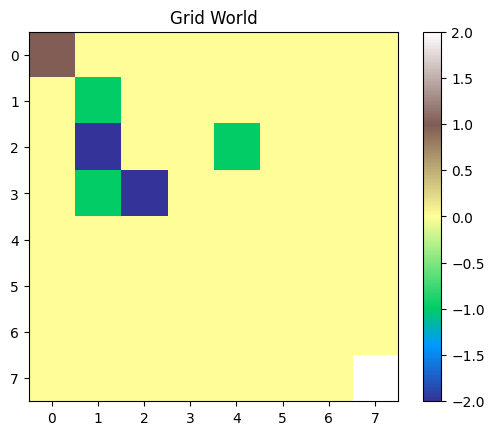

Tomando acao: right
Posicao do Agente: (0, 1)
Tomando acao: left
Posicao do Agente: (0, 0)
Tomando acao: down
Posicao do Agente: (1, 0)
Tomando acao: right
Posicao do Agente: (1, 0)
Tomando acao: up
Posicao do Agente: (0, 0)
Tomando acao: down
Posicao do Agente: (1, 0)
Tomando acao: right
Posicao do Agente: (1, 0)
Tomando acao: up
Posicao do Agente: (0, 0)
Tomando acao: down
Posicao do Agente: (1, 0)
Tomando acao: down
Posicao do Agente: (2, 0)
Tomando acao: down
Posicao do Agente: (3, 0)
Tomando acao: right
Posicao do Agente: (3, 0)
Tomando acao: up
Posicao do Agente: (2, 0)
Tomando acao: right
Posicao do Agente: (2, 1)
Agente chegou na areia! Game Over!


In [22]:
# Exemplo de uso:
if __name__ == "__main__":
    montanhas = [(1, 1), (2, 4), (3, 1)]
    areia = [(2, 1), (3, 2)]
    env = GridWorld(inicio=(0, 0), chegada=(7, 7), montanhas=montanhas, areia=areia)
    env.visualizar_grid()
    while not env.game_over():
        acoes = env.acoes_disponiveis()
        acao = random.choice(acoes)
        print("Tomando acao:", acao)
        env.move(acao)
        print("Posicao do Agente:", env.posicao_agente)
        if env.posicao_agente == env.chegada:
            print("Chegou!")
        elif env.posicao_agente in env.areia:
            print("Agente chegou na areia! Game Over!")
            break